In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as pearsonr

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.svm import SVC

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from IPython.display import Image

In [18]:
from os import system

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
from sklearn.tree import export_graphviz

In [26]:
from six import StringIO

In [29]:
import pydotplus

In [35]:
import graphviz

In [31]:
from statistics import median, mean

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [36]:
data = pd.read_csv('bank-full.csv')

In [60]:
data.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [38]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [41]:
data.shape

(45211, 17)

In [42]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [43]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [46]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [47]:
data.dtypes.to_frame("Datatypes of Attribute").T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attribute,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [49]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# check missing values

In [50]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [51]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [52]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [53]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [55]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [56]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [59]:
median(data.age)

39

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-61-d10bc7c256d3>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


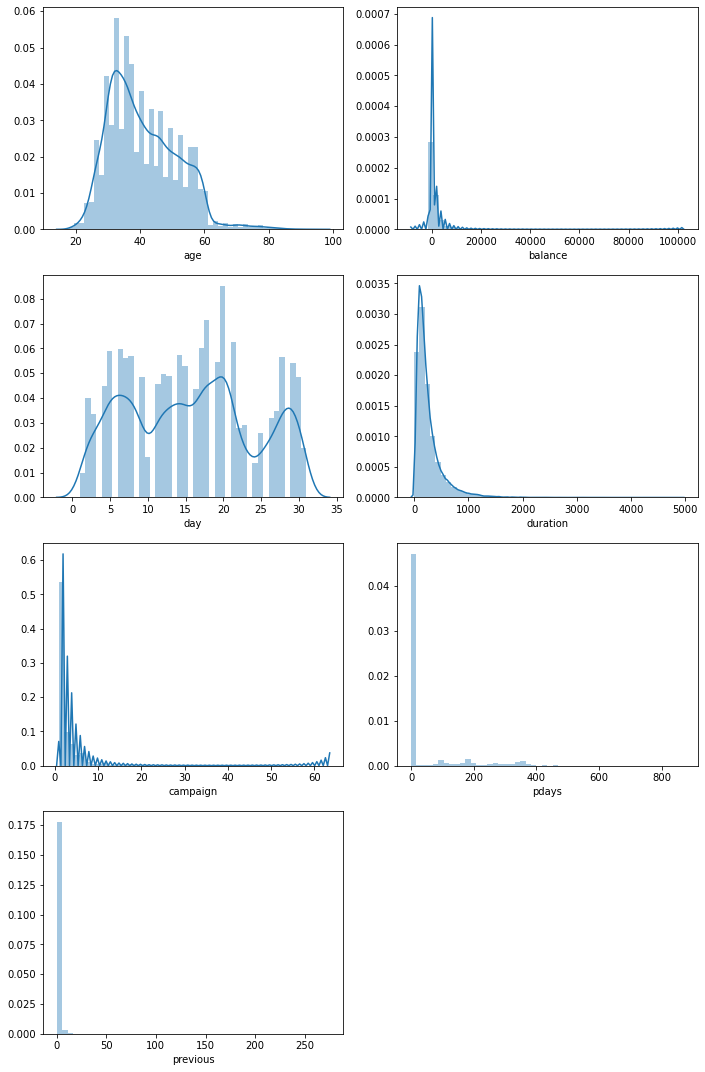

In [61]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
axe = axe.flatten()
sns.distplot(data['age'], ax=axe[0])
sns.distplot(data['balance'], ax=axe[1])
sns.distplot(data['day'], ax=axe[2])
sns.distplot(data['duration'], ax=axe[3])
sns.distplot(data['campaign'], ax=axe[4])
sns.distplot(data['pdays'], ax=axe[5])
sns.distplot(data['previous'], ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

<ipython-input-66-55f5a0247630>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


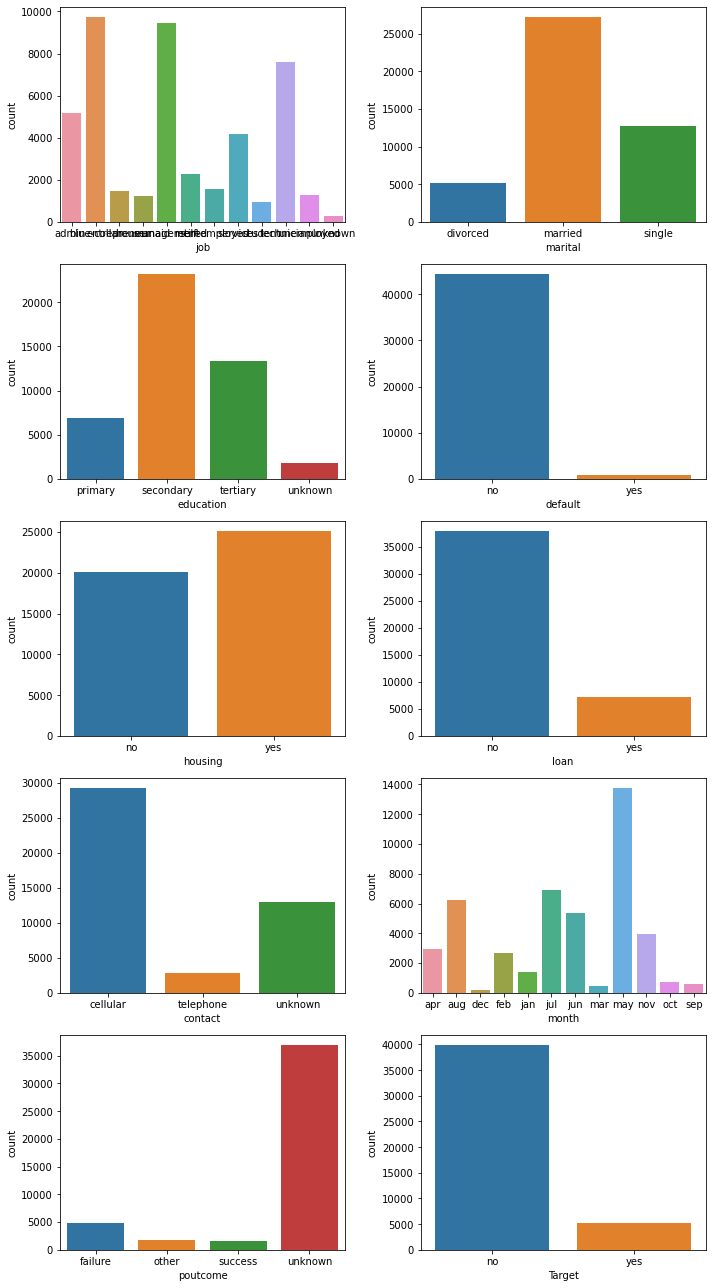

In [66]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10,18))
axe = axe.flatten()
plot=sns.countplot(x=data['job'], data=data, ax=axe[0])
#plt.set(plt.get_figlabels, rotation=90)

sns.countplot(x=data['marital'], data=data, ax=axe[1])
sns.countplot(x=data['education'], data=data, ax=axe[2])
sns.countplot(x=data['default'], data=data, ax=axe[3])
sns.countplot(x=data['housing'], data=data, ax=axe[4])
sns.countplot(x=data['loan'], data=data, ax=axe[5])
sns.countplot(x=data['contact'], data=data, ax=axe[6])
sns.countplot(x=data['month'], data=data, ax=axe[7])
sns.countplot(x=data['poutcome'], data=data, ax=axe[8])
sns.countplot(x=data['Target'], data=data, ax=axe[9])

fig.tight_layout()
fig.show()


In [67]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


<ipython-input-68-275d821c4d98>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


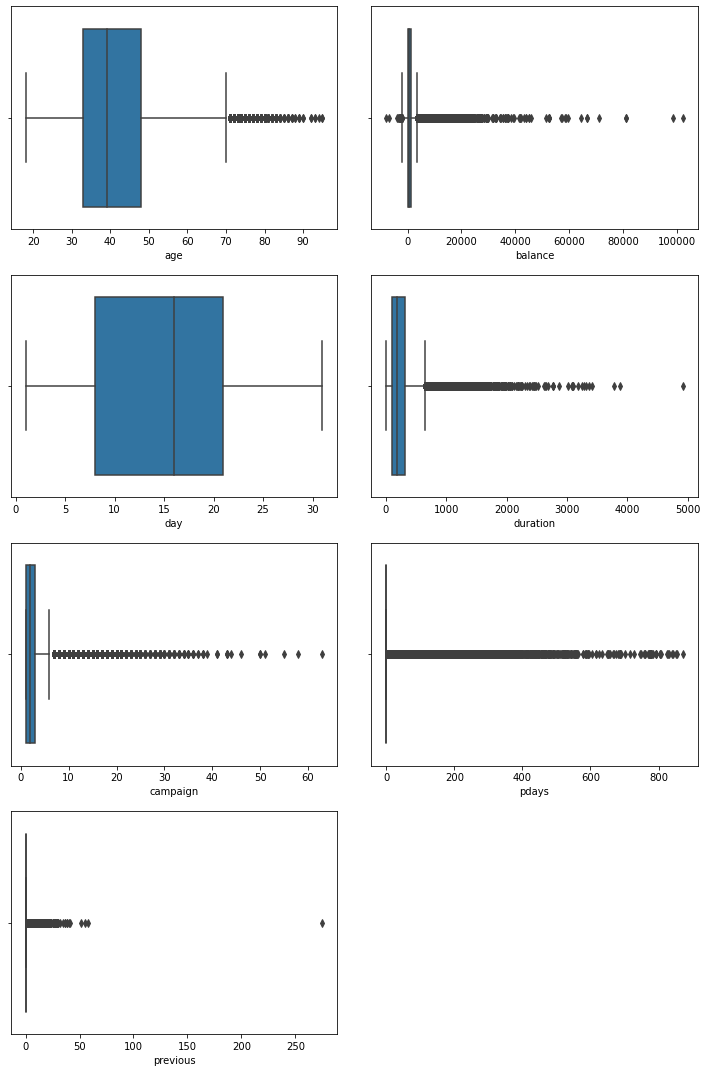

In [68]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
axe = axe.flatten()

sns.boxplot(x='age', data=data, ax=axe[0])
sns.boxplot(x='balance', data=data, ax=axe[1])
sns.boxplot(x='day', data=data, ax=axe[2])
sns.boxplot(x='duration', data=data, ax=axe[3])
sns.boxplot(x='campaign', data=data, ax=axe[4])
sns.boxplot(x='pdays', data=data, ax=axe[5])
sns.boxplot(x='previous', data=data, ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [69]:
data['Target'].value_counts().to_frame("Target Features Distribution")

,Target Features Distribution
no,39922
yes,5289


In [73]:
df = data.copy()
encoder = LabelEncoder()
df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int)
df['loan'] = encoder.fit_transform(df['loan']).astype(int)
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [75]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [80]:
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [81]:
meandur = float(df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'],75),meanbal,df['duration'])

In [82]:
meancam = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'],75),meanbal,df['campaign'])

In [83]:
meanpd = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'],75),meanbal,df['pdays'])

In [84]:
meanpr = float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'],75),meanbal,df['previous'])

<ipython-input-86-8913c2db4973>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


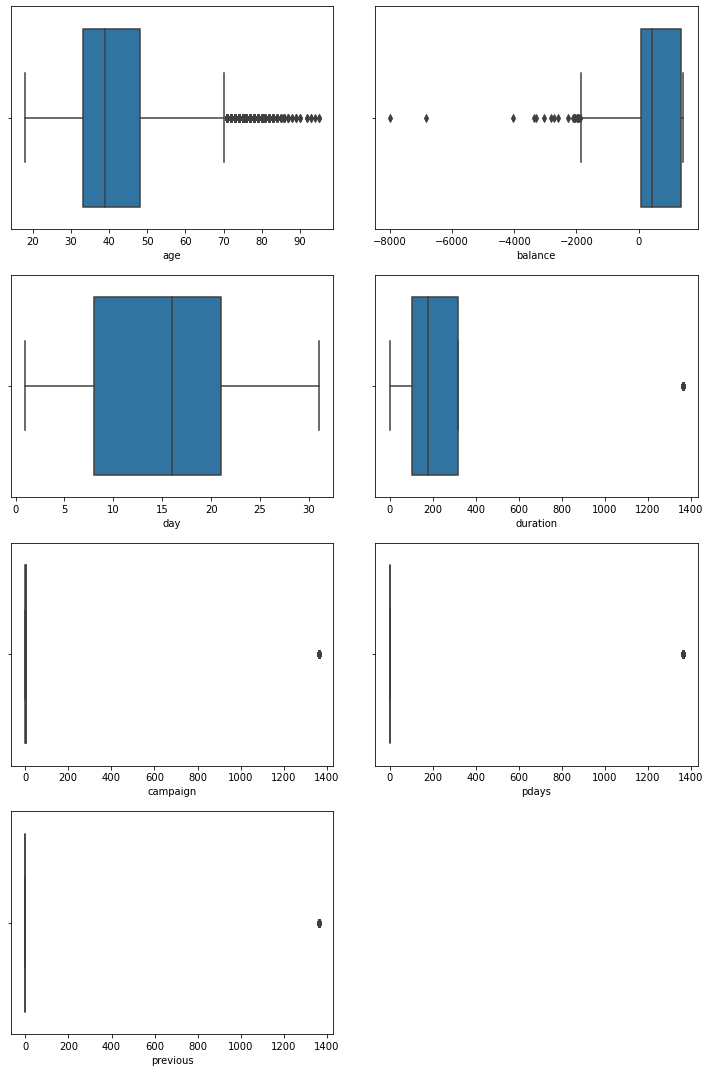

In [86]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
axe = axe.flatten()

sns.boxplot(x='age', data=df, ax=axe[0])
sns.boxplot(x='balance', data=df, ax=axe[1])
sns.boxplot(x='day', data=df, ax=axe[2])
sns.boxplot(x='duration', data=df, ax=axe[3])
sns.boxplot(x='campaign', data=df, ax=axe[4])
sns.boxplot(x='pdays', data=df, ax=axe[5])
sns.boxplot(x='previous', data=df, ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

<AxesSubplot:>

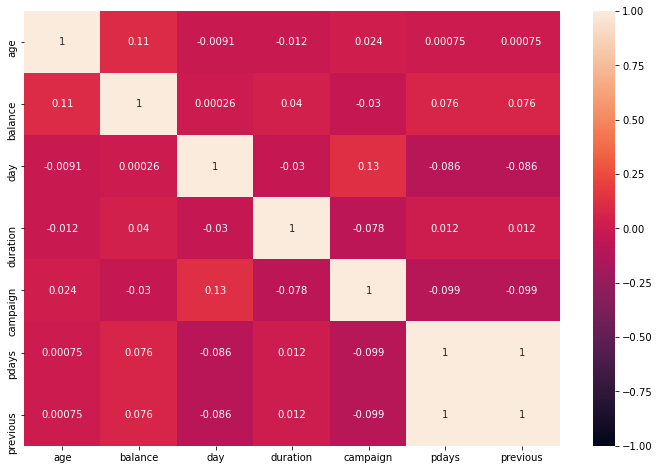

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

<AxesSubplot:>

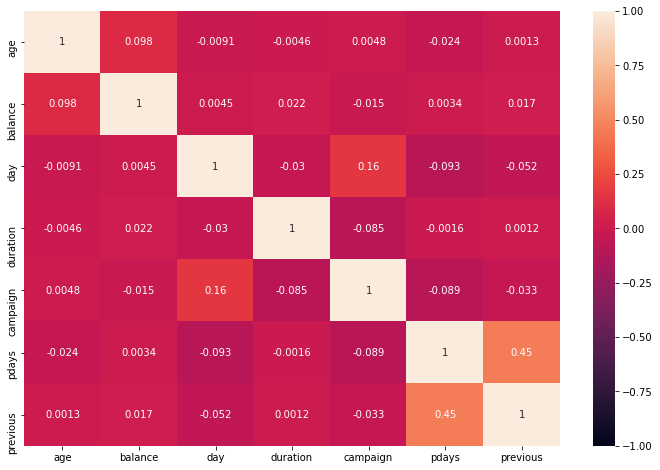

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)

In [90]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [91]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [94]:
df2 = df.drop(['job','education' ,'contact', 'duration','pdays','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


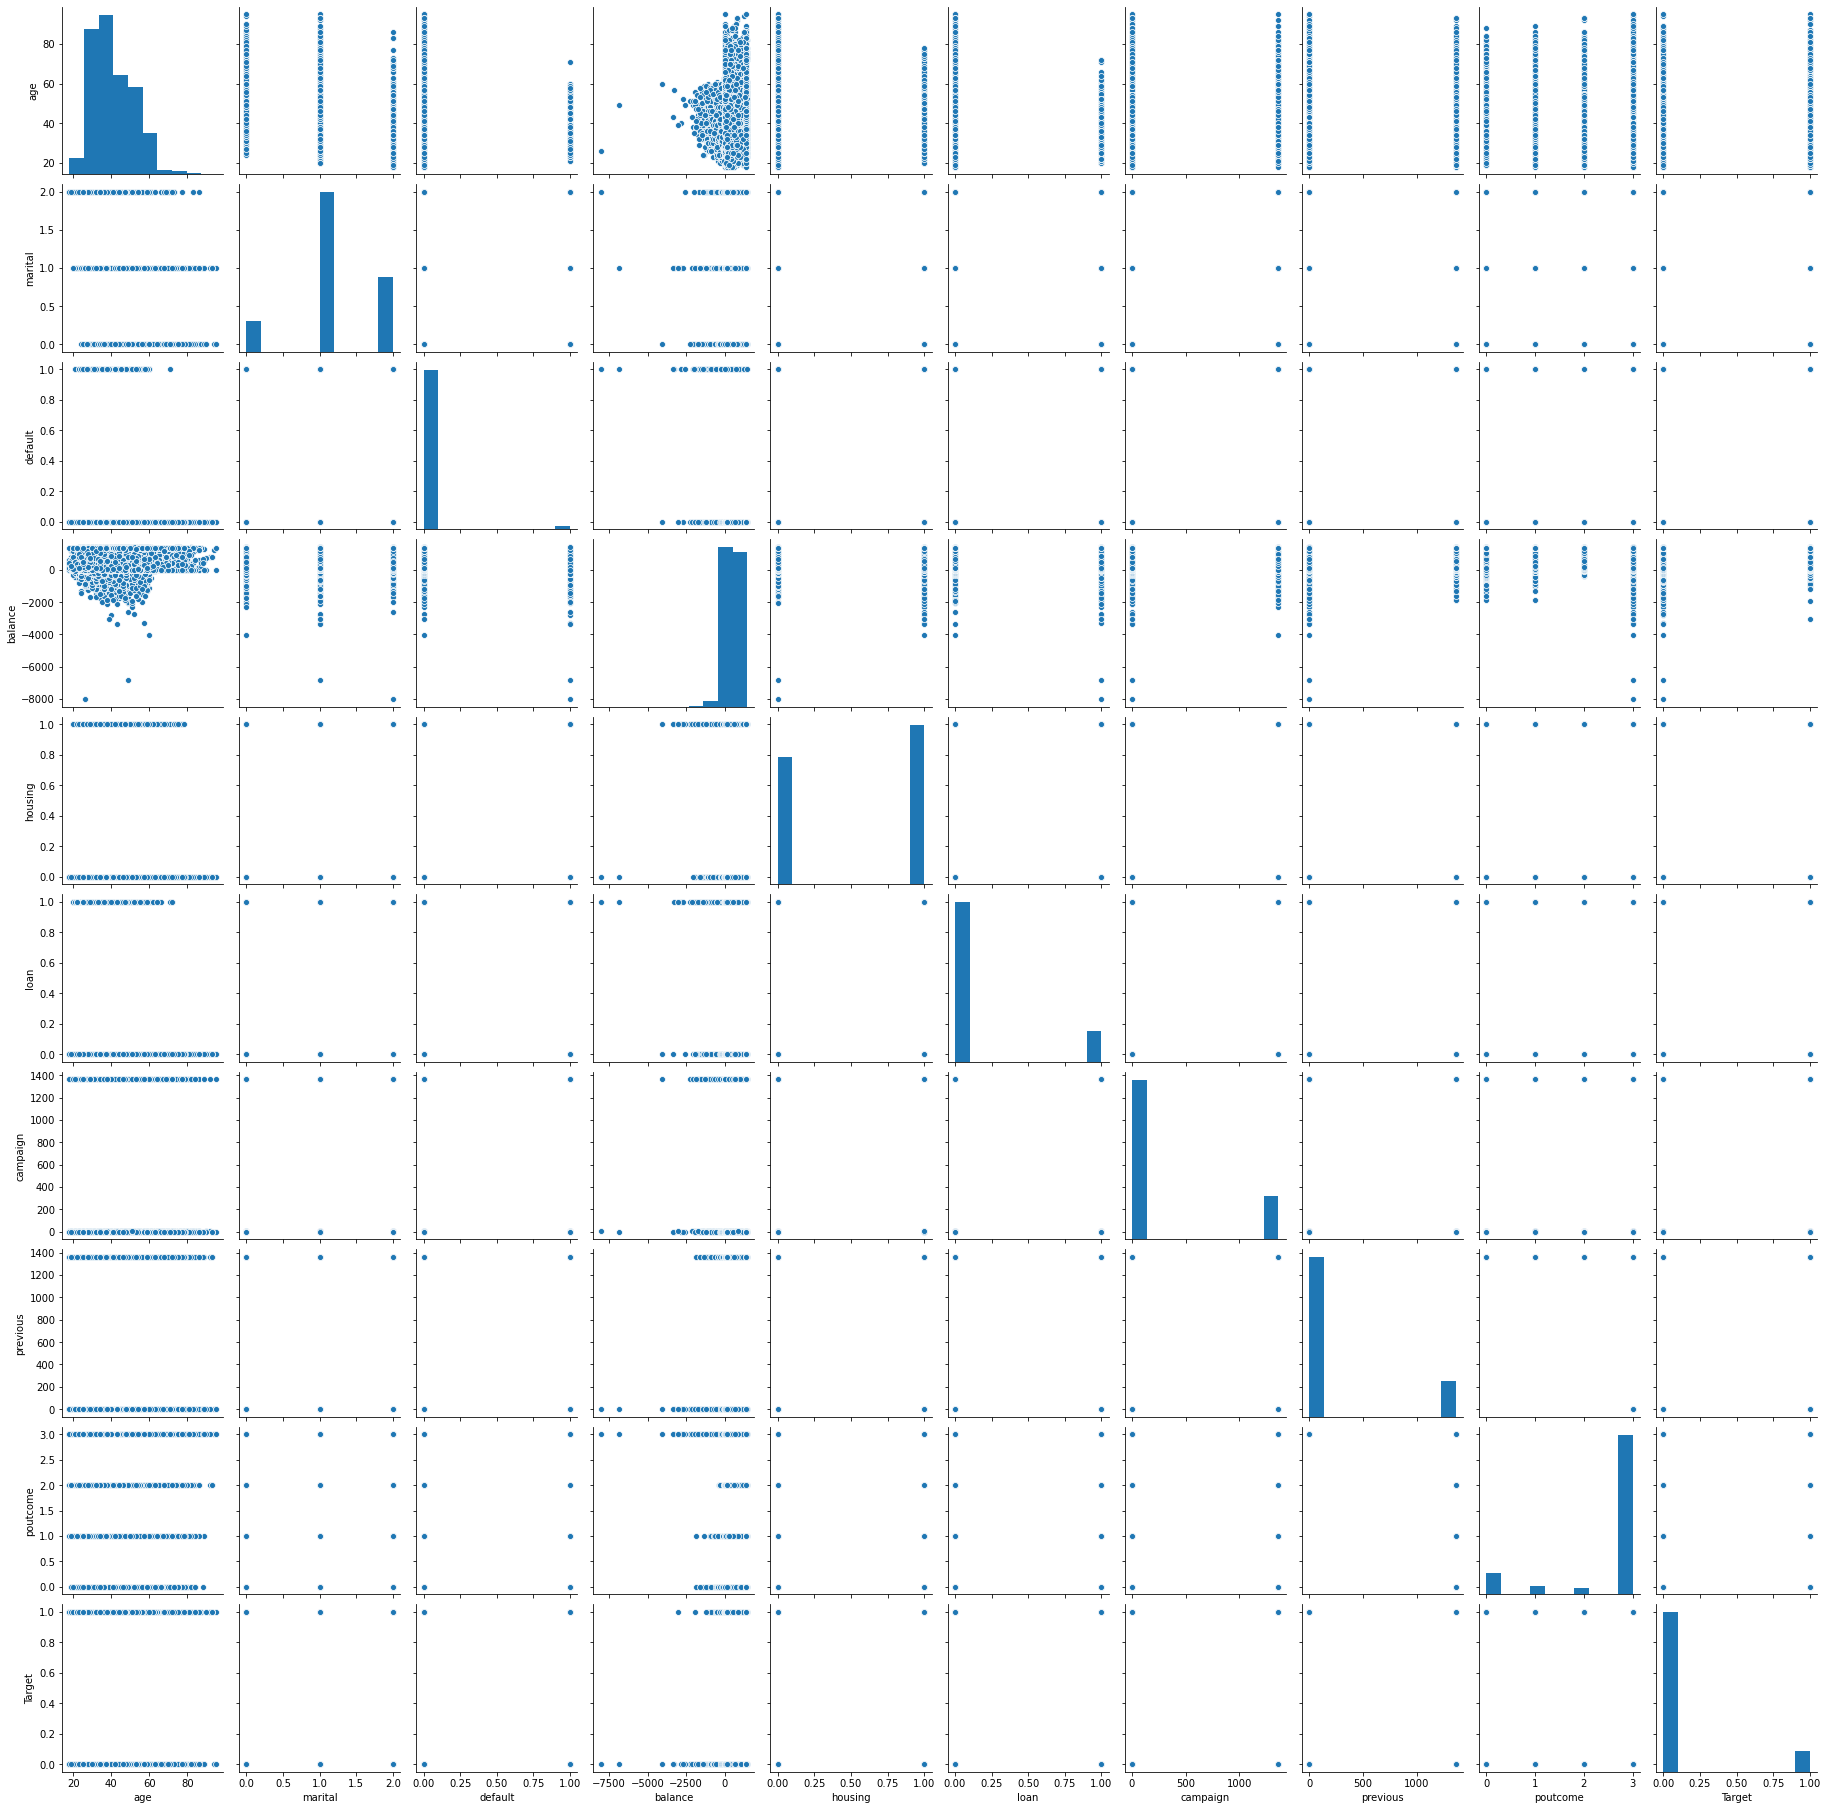

In [96]:
sns.pairplot(df2)

In [97]:
x = df2.drop('Target',axis=1)
y = df2['Target']

In [98]:
x

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.000000,0.000000,3
1,44,2,0,29.000000,1,0,1.000000,0.000000,3
2,33,1,0,2.000000,1,1,1.000000,0.000000,3
3,47,1,0,1362.272058,1,0,1.000000,0.000000,3
4,33,2,0,1.000000,0,0,1.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...
45206,51,1,0,825.000000,0,0,3.000000,0.000000,3
45207,71,0,0,1362.272058,0,0,2.000000,0.000000,3
45208,72,1,0,1362.272058,0,0,1362.272058,1362.272058,2
45209,57,1,0,668.000000,0,0,1362.272058,0.000000,3


In [99]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: category
Categories (2, int64): [0, 1]

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.3,random_state=2)

In [101]:
scaler=StandardScaler()

In [102]:
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

In [103]:
logic_r = LogisticRegression(solver='liblinear')

In [104]:
logic_r.fit(xtrain_scaled, ytrain)

LogisticRegression(solver='liblinear')

In [106]:
y_pred = logic_r.predict(xtest_scaled)
LR_accuracy = accuracy_score(ytest, y_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, y_pred))
print('\n Accuracy Score \n', LR_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, y_pred))

Confusion Matrix
 [[11897   102]
 [ 1316   249]]

 Accuracy Score 
 89.54585667944559

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.16      0.26      1565

    accuracy                           0.90     13564
   macro avg       0.80      0.58      0.60     13564
weighted avg       0.88      0.90      0.86     13564



In [107]:
NB = GaussianNB()

In [109]:
NB.fit(xtrain_scaled, ytrain)
y_predi = NB.predict(xtest_scaled)

NB_accuracy = accuracy_score(ytest, y_predi)
print('Confusion Matrix\n', confusion_matrix(ytest, y_predi))
print('\n Accuracy Score \n', NB_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, y_predi))

Confusion Matrix
 [[10627  1372]
 [ 1043   522]]

 Accuracy Score 
 82.19551754644647

 Classification Report 

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



In [110]:
knn = KNeighborsClassifier(n_neighbors=3)

In [111]:
knn.fit(xtrain_scaled, ytrain)
y_predict = knn.predict(xtest_scaled)

KNN_accuracy = accuracy_score(ytest, y_predict)
print('Confusion Matrix\n', confusion_matrix(ytest, y_predict))
print('\n Accuracy Score \n', KNN_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, y_predict))

Confusion Matrix
 [[11488   511]
 [ 1231   334]]

 Accuracy Score 
 87.15718077263345

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.40      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.60     13564
weighted avg       0.84      0.87      0.85     13564



In [112]:
svc=SVC()

In [113]:
svc.fit(xtrain_scaled, ytrain)
y_pred1 = svc.predict(xtest_scaled)

SVC_accuracy = accuracy_score(ytest, y_pred1)
print('Confusion Matrix\n', confusion_matrix(ytest, y_pred1))
print('\n Accuracy Score \n', SVC_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, y_pred1))

Confusion Matrix
 [[11862   137]
 [ 1284   281]]

 Accuracy Score 
 89.52373930993807

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.18      0.28      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



In [114]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1)

In [116]:
dtree.fit(xtrain_scaled, ytrain)
dt_pred = dtree.predict(xtest_scaled)

DT_accuracy = accuracy_score(ytest, dt_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, dt_pred))
print('\n Accuracy Score \n', DT_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, dt_pred))

Confusion Matrix
 [[10846  1153]
 [ 1167   398]]

 Accuracy Score 
 82.89590091418461

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.26      0.25      0.26      1565

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564



# Bagging Ensemble Model

In [123]:
bagc = BaggingClassifier(base_estimator=dtree,n_estimators=500, random_state=1)

In [124]:
bagc.fit(xtrain_scaled, ytrain)
bagc_pred = bagc.predict(xtest_scaled)

BAG_accuracy = accuracy_score(ytest, bagc_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, bagc_pred))
print('\n Accuracy Score \n', BAG_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, bagc_pred))

Confusion Matrix
 [[11550   449]
 [ 1240   325]]

 Accuracy Score 
 87.5479209672663

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.60     13564
weighted avg       0.85      0.88      0.86     13564



# Adaptive BOOSTING ENSEMBLE MODEL

In [125]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)

In [127]:
adab.fit(xtrain, ytrain)
ada_pred = adab.predict(xtest)

ADA_accuracy = accuracy_score(ytest, ada_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, ada_pred))
print('\n Accuracy Score \n', ADA_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, ada_pred))

Confusion Matrix
 [[11888   111]
 [ 1323   242]]

 Accuracy Score 
 89.42789737540548

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Random Forest Ensemble Model

In [128]:
randf = RandomForestClassifier(n_estimators=100, random_state=2, max_features=3)

In [129]:
randf.fit(xtrain, ytrain)
ran_pred = randf.predict(xtest)

RAN_accuracy = accuracy_score(ytest, ran_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, ran_pred))
print('\n Accuracy Score \n', RAN_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, ran_pred))

Confusion Matrix
 [[11541   458]
 [ 1219   346]]

 Accuracy Score 
 87.63639044529637

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# GradientBoostingClassifier 

In [130]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=2)
grad.fit(xtrain, ytrain)
grad_pred = randf.predict(xtest)

GRAD_accuracy = accuracy_score(ytest, grad_pred)
print('Confusion Matrix\n', confusion_matrix(ytest, grad_pred))
print('\n Accuracy Score \n', GRAD_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest, grad_pred))

Confusion Matrix
 [[11541   458]
 [ 1219   346]]

 Accuracy Score 
 87.63639044529637

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Model with accuracy scores

In [133]:
scores=[('Naive Bayes', NB_accuracy),
        ('KNN', KNN_accuracy),
        ('Logistic Regression', LR_accuracy ),
        ('SVC', SVC_accuracy),
        ('Decision Tree', DT_accuracy),
        ('Bagging', BAG_accuracy),
        ('Adaptive Boosting ', ADA_accuracy),
        ('Gradient Boosting', GRAD_accuracy),
        ('Random Forest', RAN_accuracy)
       ]

scores = pd.DataFrame(scores,columns=["Model",'Accuracy Score'])

print('\033[1m'' Cuttent scores with outliers replaced with mean:]')

scores.sort_values(by='Accuracy Score', ascending=False)

 Cuttent scores with outliers replaced with mean:]


,Model,Accuracy Score
2,Logistic Regression,0.895459
3,SVC,0.895237
6,Adaptive Boosting,0.894279
7,Gradient Boosting,0.876364
8,Random Forest,0.876364
5,Bagging,0.875479
1,KNN,0.871572
4,Decision Tree,0.828959
0,Naive Bayes,0.821955
